In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")
import numpy as np

from data_loading import load_runs

In [3]:
RUN = ["1","2","3","4b","4c","4d","5"]

## Defining numu sidebands

In [4]:
rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUN,
    data="muon_sideband",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=True,
    loadsystematics=True,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=False,
    blinded=False, 
    enable_cache=True,
)

Loading run 1
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
Loading run 2
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
Loading run 3
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
Loading run 4b
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
Loading run 4c
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
Loading run 4d
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
Loading run 5
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also app

In [5]:
for key in rundata_numu:
    rundata_numu[key]['npi'] = rundata_numu[key].eval('npion+npi0')

In [6]:
### To Accomodate Detvars, Use Multiple Singal Generators ###
from microfit.histogram import Binning, MultiChannelBinning
from microfit import histogram as hist
import make_detsys as detsys

In [7]:
numu_np_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
selection = "NUMUNP0PI"
preselection = "NUMU"
numu_np_binning.label = "NUMUNP0PI"

numu_np_detvars = detsys.make_variations(
    RUN,
    "muon_sideband",
    selection,
    preselection,
    numu_np_binning,
    make_plots=False,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadshowervariables=True,
    loadsystematics=False,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=False,
    blinded=False, 
    enable_cache=True,
)

signal_generator_numu_np_detvars = hist.RunHistGenerator(
    rundata_numu,
    numu_np_binning,
    data_pot=data_pot_numu,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=numu_np_detvars
)

Loading devar histograms from file: /uboone/data/users/cthorpe/cached_detvars//run_1234b4c4d5_NUMU_NUMUNP0PI_neutrino_energy.json


In [8]:
numu_zp_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
selection = "NUMU0P0PI"
preselection = "NUMU"
numu_zp_binning.label = "NUMU0P0PI"

numu_zp_detvars = detsys.make_variations(
    RUN,
    "muon_sideband",
    selection,
    preselection,
    numu_zp_binning,
    make_plots=False,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadshowervariables=True,
    loadsystematics=False,
    use_bdt=False,
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=False,
    blinded=False, 
    enable_cache=True,
)

signal_generator_numu_zp_detvars = hist.RunHistGenerator(
    rundata_numu,
    numu_zp_binning,
    data_pot=data_pot_numu,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=numu_zp_detvars
)

Loading devar histograms from file: /uboone/data/users/cthorpe/cached_detvars//run_1234b4c4d5_NUMU_NUMU0P0PI_neutrino_energy.json


## Define two-shower sideband

In [9]:
rundata_pi0, mc_weights_pi0, data_pot_pi0 = load_runs(
    RUN,
    data="two_shr_sideband",
    truth_filtered_sets=["nue", "drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=False,
    loadsystematics=True,
    load_crt_vars=False,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    enable_cache=True,
    blinded=False,
)

Loading run 1
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
Loading run 2
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
Loading run 3
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
Loading run 4b
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
Loading run 4c
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
Loading run 4d
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
Loading run 5
The sideband data you're using had the fo

In [10]:
pi0_binning = Binning.from_config("reco_e", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
selection = "PI0"
preselection = "PI0"
pi0_binning.label = "PI0"

pi0_detvars = detsys.make_variations(
    RUN,
    "two_shr_sideband",
    selection,
    preselection,
    pi0_binning,
    make_plots=True,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=False,
    loadsystematics=False,
    load_crt_vars=False,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    enable_cache=True,
    blinded=False
)

signal_generator_pi0 = hist.RunHistGenerator(
    rundata_pi0,
    pi0_binning,
    data_pot=data_pot_pi0,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=pi0_detvars
)

Loading devar histograms from file: /uboone/data/users/cthorpe/cached_detvars//run_1234b4c4d5_PI0_PI0_reco_e.json


## Load the signals

In [11]:
signal_rundata, signal_mc_weights, signal_data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    truth_filtered_sets=["nue", "drt"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_lee=True,
    enable_cache=True,
    blinded=True,
)

Loading run 1
Loading run 2
Loading run 3
Loading run 4b
Loading run 4c
Loading run 4d
Loading run 5


In [12]:
from microfit.parameters import Parameter, ParameterSet
from microfit.signal_generators import SignalOverBackgroundGenerator
from microfit.run_plotter import RunHistPlotter

signal_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),
    ]
)

In [13]:
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

zp_binning = Binning.from_config(*binning_def)
#zp_binning.set_selection(preselection="ZP", selection="ZPBDT")
zp_binning.label = "ZPBDT"
selection = "ZPBDT"
preselection = "ZP"

zp_detvars = detsys.make_variations(
    RUN,
    "bnb",
    selection+"_GoodBG",
    preselection,
    zp_binning,
    make_plots=True,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=False,
    load_lee=True,
    enable_cache=True,
    blinded=True,
)

signal_generator_misc_bg_zp = hist.RunHistGenerator(
    signal_rundata,
    zp_binning,
    data_pot=signal_data_pot,
    selection=selection+"_MiscBG",
    preselection=preselection,
    uncertainty_defaults={"include_multisim_errors": False,"include_unisim_errors": False},
)

extra_frac_unc = 0.2

pred_hist_misc = signal_generator_misc_bg_zp.get_total_prediction(include_multisim_errors=False,add_precomputed_detsys=False)
nominal_values = pred_hist_misc.bin_counts

extra_cov = np.zeros(shape=(zp_binning.n_bins,zp_binning.n_bins))
for i in range(0,zp_binning.n_bins-1):
    extra_cov[i][i] = extra_frac_unc**2*nominal_values[i]**2
    
signal_generator_zp = hist.RunHistGenerator(
    signal_rundata,
    zp_binning,
    data_pot=signal_data_pot,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=zp_detvars,
    parameters=signal_parameters,
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    signal_query="category == 111",
    background_query="category != 111",
    extra_mc_covariance=extra_cov
)

Loading devar histograms from file: /uboone/data/users/cthorpe/cached_detvars//run_1234b4c4d5_ZP_ZPBDT_GoodBG_reco_e.json


../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


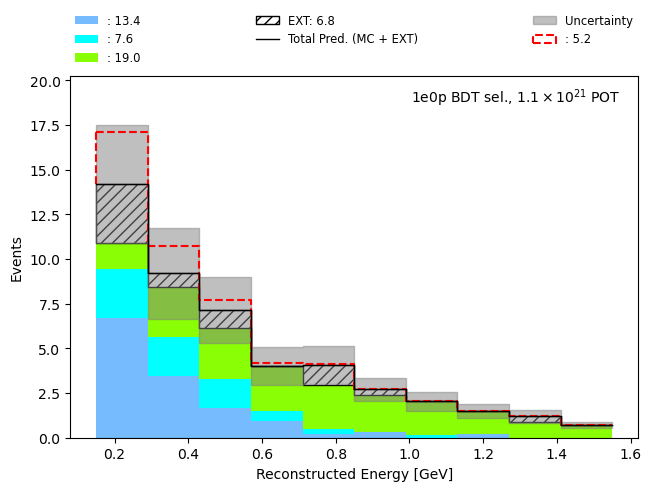

In [14]:
ax = RunHistPlotter(signal_generator_zp).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="ZPBDT",add_precomputed_detsys=True
)

In [15]:
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

np_binning = Binning.from_config(*binning_def)
#p_binning.set_selection(preselection="P", selection="NPBDT")
np_binning.label = "NPBDT"
selection = "NPBDT"
preselection = "NP"

np_detvars = detsys.make_variations(
    RUN,
    "bnb",
    selection+"_GoodBG",
    preselection,
    np_binning,
    make_plots=True,
    enable_detvar_cache=True,
    truth_filtered_sets=["nue","nc_pi0"],
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=False,
    load_lee=True,
    enable_cache=True,
    blinded=True,
)

signal_generator_misc_bg_np = hist.RunHistGenerator(
    signal_rundata,
    np_binning,
    data_pot=signal_data_pot,
    selection=selection+"_MiscBG",
    preselection=preselection,
    uncertainty_defaults={"include_multisim_errors": False,"include_unisim_errors": False},
)

extra_frac_unc = 0.2

pred_hist_misc = signal_generator_misc_bg_np.get_total_prediction(include_multisim_errors=False,add_precomputed_detsys=False)
nominal_values = pred_hist_misc.bin_counts

extra_cov = np.zeros(shape=(np_binning.n_bins,np_binning.n_bins))
for i in range(0,np_binning.n_bins-1):
    extra_cov[i][i] = extra_frac_unc**2*nominal_values[i]**2

signal_generator_np = hist.RunHistGenerator(
    signal_rundata,
    np_binning,
    data_pot=signal_data_pot,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data=np_detvars,
    parameters=signal_parameters,
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    signal_query="category == 111",
    background_query="category != 111",
    extra_mc_covariance=extra_cov,
    enable_cache=False
)

Loading devar histograms from file: /uboone/data/users/cthorpe/cached_detvars//run_1234b4c4d5_NP_NPBDT_GoodBG_reco_e.json


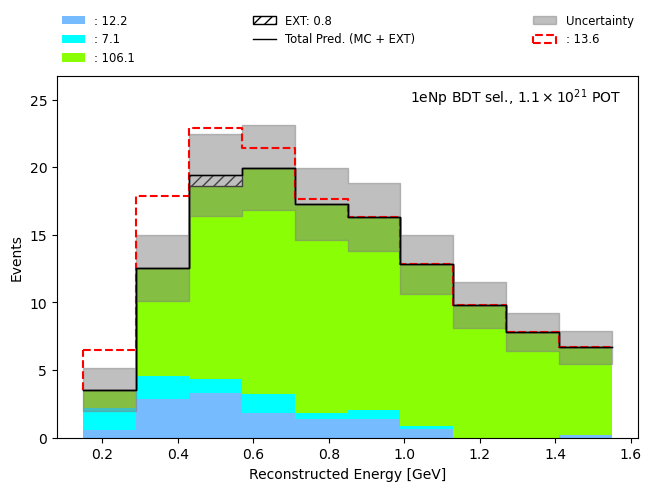

In [16]:
signal_parameters["signal_strength"].value = 1.0

ax = RunHistPlotter(signal_generator_np).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",add_precomputed_detsys=True
)

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	5		(0, 10)



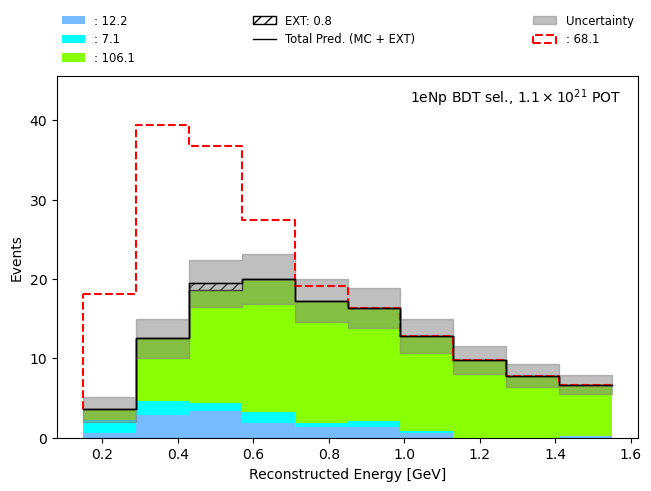

In [17]:
signal_generator_np.parameters["signal_strength"].value = 5.0

print(signal_generator_np.parameters)

ax = RunHistPlotter(signal_generator_np).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",add_precomputed_detsys=True
)

## Assemble Analysis

In [18]:
from microfit.analysis import MultibandAnalysis

analysis = MultibandAnalysis(
    run_hist_generators=[signal_generator_numu_np_detvars,signal_generator_numu_zp_detvars,signal_generator_pi0,signal_generator_zp,signal_generator_np],
    constraint_channels=["NUMUNP0PI", "NUMU0P0PI", "PI0"],
    signal_channels=["NPBDT", "ZPBDT"],
)

In [19]:
analysis.parameters["signal_strength"].value = 1.0

Including detsim uncertainties
Calculating multichannel detsim uncertainties


<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

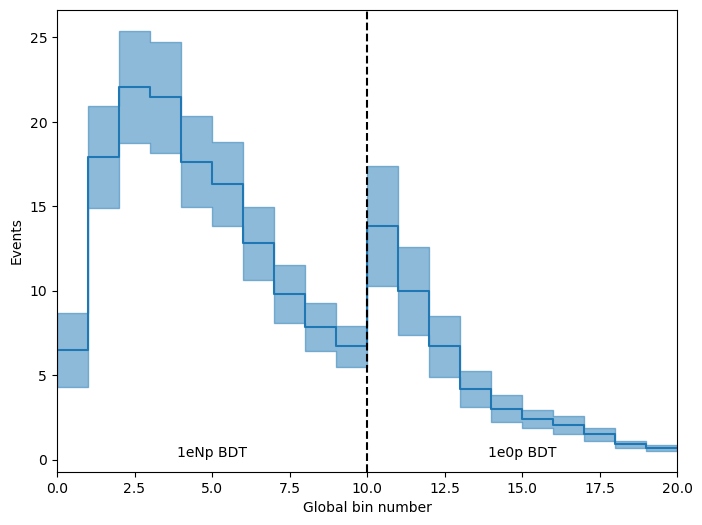

In [20]:
import matplotlib.pyplot as plt

mc_hist = analysis.get_mc_hist(include_multisim_errors=True,add_precomputed_detsys=True)
mc_hist_constrained = analysis.get_mc_hist(include_multisim_errors=True, use_sideband=True,add_precomputed_detsys=True)
total_hist = analysis.generate_multiband_histogram(include_multisim_errors=True, include_non_signal_channels=False,add_precomputed_detsys=True)

fig, ax = plt.subplots(figsize=(8, 6))
mc_hist.draw(ax=ax, label="MC")
mc_hist_constrained.draw(ax=ax, label="Constrained")
total_hist.draw(ax=ax, label="Total")
ax.legend()

In [21]:
analysis.parameters["signal_strength"].value = 1.0

Including detsim uncertainties
Calculating multichannel detsim uncertainties


/uboone/app/users/cthorpe/Mambaforge/envs/python3LEE/lib/python3.7/site-packages/matplotlib/axes/_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


(<AxesSubplot:xlabel='Global bin number', ylabel='Events'>, None)

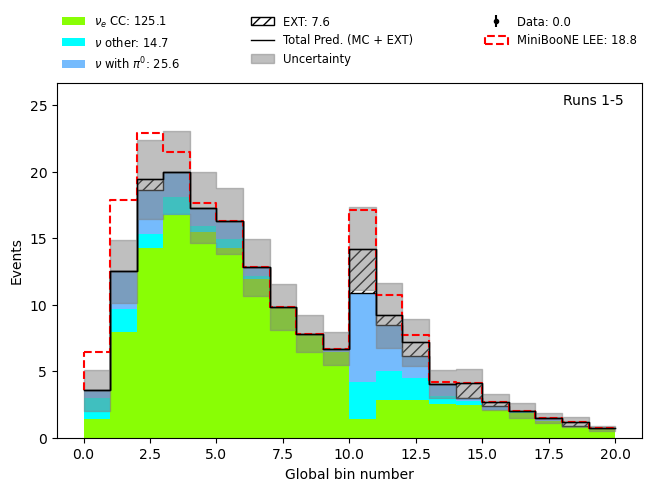

In [22]:
RunHistPlotter(analysis).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False, title="Runs 1-5", use_sideband=False,add_precomputed_detsys=True
)

Including detsim uncertainties
Calculating multichannel detsim uncertainties
Including detsim uncertainties
Calculating multichannel detsim uncertainties


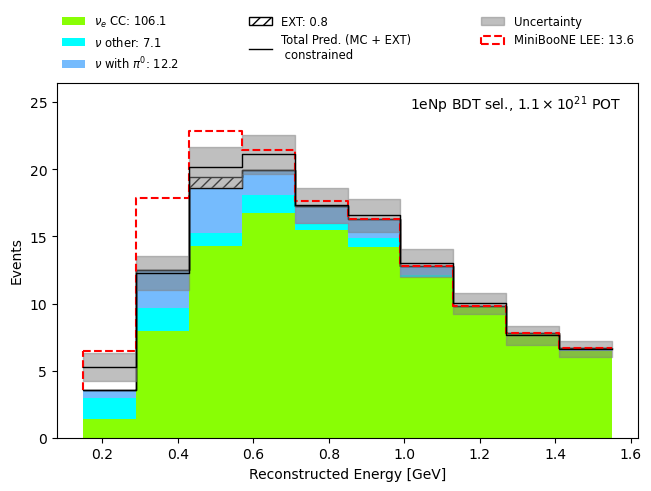

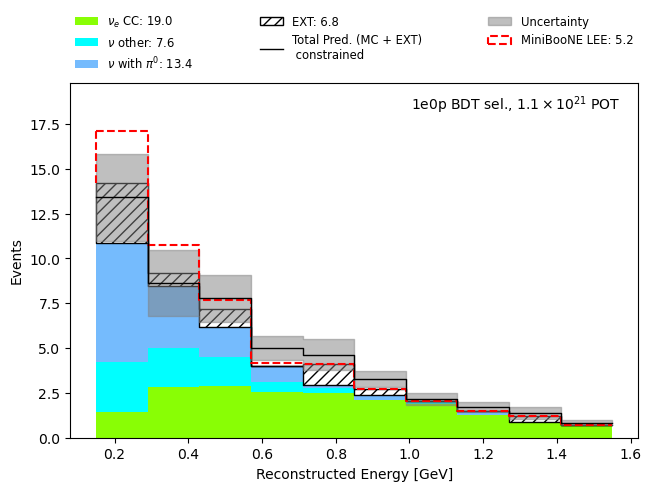

In [23]:
analysis.plot_signals(
    add_ext_error_floor=False, include_multisim_errors=True, show_data_mc_ratio=False, use_sideband=True,add_precomputed_detsys=True,
    separate_figures=True,
)

In [24]:
analysis.plot_sidebands(
    include_multisim_errors=True,
    show_data_mc_ratio=True,
    add_ext_error_floor=False,
    separate_figures=True,
    add_precomputed_detsys=True,
    save_path="."
)

../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


Including detsim uncertainties
Calculating multichannel detsim uncertainties


../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


Including detsim uncertainties
Calculating multichannel detsim uncertainties


../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


Including detsim uncertainties
Calculating multichannel detsim uncertainties


../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


Including detsim uncertainties
Calculating multichannel detsim uncertainties


(<Figure size 800x600 with 2 Axes>,
 <AxesSubplot:title={'center':'Correlation matrix'}>)

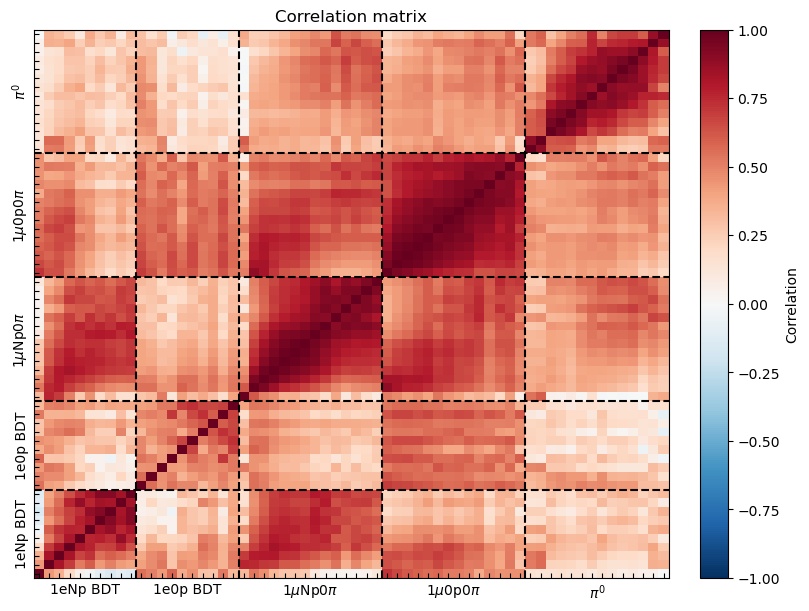

In [25]:
analysis.plot_correlation(add_precomputed_detsys=True)

In [26]:
analysis.parameters

Parameters:
Name	Value	Unit	Bounds
-------------------------------
signal_strength	1		(0, 10)

In [27]:
analysis.parameters["signal_strength"].value = 1.0

multi_channel_mc_hist = analysis.generate_multiband_histogram(
    include_multisim_errors=True,
    include_non_signal_channels=True,
    add_precomputed_detsys=True,
)

<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

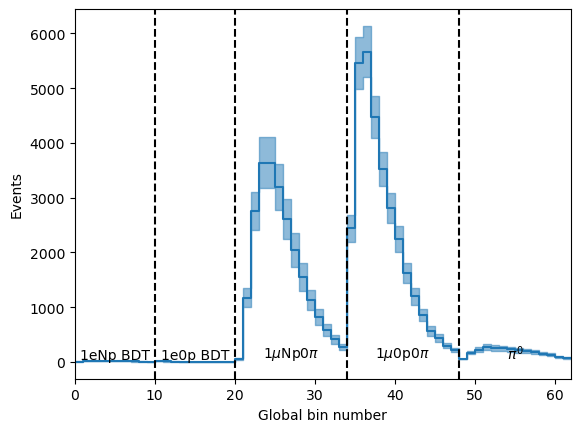

In [28]:
multi_channel_mc_hist.draw()

<AxesSubplot:title={'center':'Correlation matrix'}>

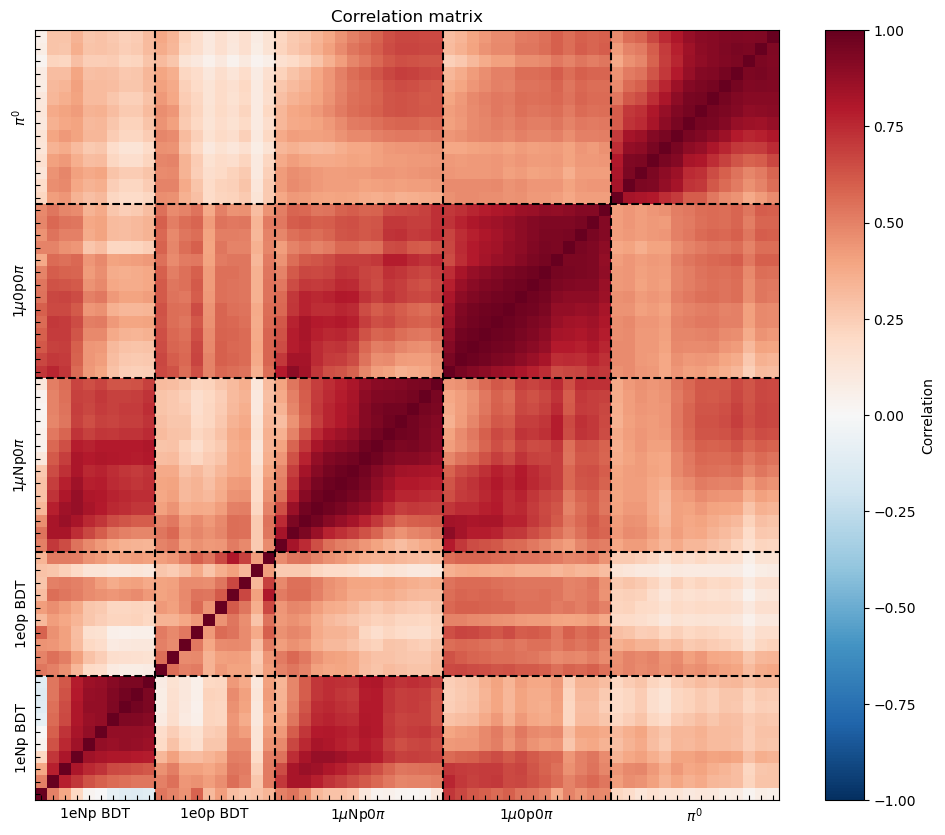

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))
# Getting the channels in the same order as in Giuseppe's plots
channels = ["NPBDT", "ZPBDT", "NUMUNP0PI", "NUMU0P0PI", "PI0"]
multi_channel_mc_hist[channels].draw_covariance_matrix(ax=ax)

In [30]:
multi_channel_hist_unconstrained = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=False,add_precomputed_detsys=True,
)

multi_channel_hist_new_constraints = analysis.generate_multiband_histogram(
    include_multisim_errors=True, use_sideband=True,add_precomputed_detsys=True,
    constraint_channels=["NUMUNP0PI", "NUMU0P0PI", "PI0"],
)

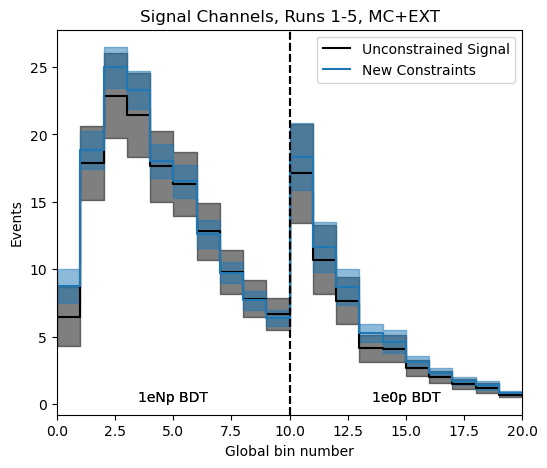

In [31]:
fig, ax = plt.subplots(figsize=(6, 5))
multi_channel_hist_unconstrained.draw(ax=ax, label="Unconstrained Signal", color="black")
multi_channel_hist_new_constraints.draw(ax=ax, label="New Constraints")

ax.legend()
ax.set_title("Signal Channels, Runs 1-5, MC+EXT")
fig.savefig("signal_channels_runs1-5_constraint_comparison.pdf")


## Get the Sensitivity

In [32]:
analysis.constraint_channels = ["NUMUNP0PI", "NUMU0P0PI", "PI0"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

two_hypo_result_new_constraints = analysis.two_hypothesis_test(
    h0_params=ParameterSet([Parameter("signal_strength", 0.0)]),
    h1_params=ParameterSet([Parameter("signal_strength", 1.0)]),
    sensitivity_only=True,
    add_precomputed_detsys=True,
    n_trials=50000,
)

Generating H0 histogram


../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",


Including detsim uncertainties
Calculating multichannel detsim uncertainties
Generating H1 histogram
Including detsim uncertainties
Calculating multichannel detsim uncertainties


Generating pseudo-experiments: 100%|██████████████████████████████████████████████████████████████████████████| 50000/50000 [06:47<00:00, 122.79it/s]


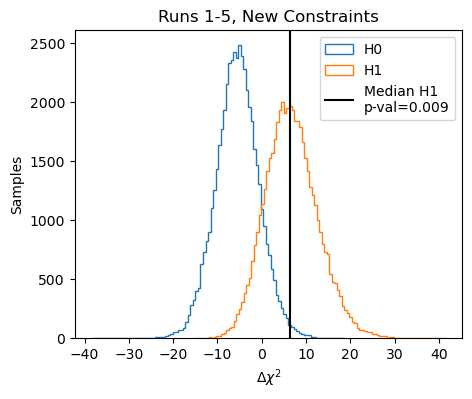

In [33]:
plt.figure(figsize=(5, 4))
plt.hist(two_hypo_result_new_constraints["samples_h0"], bins=100, label="H0", histtype="step")
plt.hist(two_hypo_result_new_constraints["samples_h1"], bins=100, label="H1", histtype="step")
plt.axvline(two_hypo_result_new_constraints["ts_median_h1"], color="black", label=f"Median H1\np-val={two_hypo_result_new_constraints['median_pval']:.3f}")
plt.legend()
plt.xlabel(r"$\Delta \chi^2$")
plt.ylabel("Samples")
plt.title("Runs 1-5, New Constraints")
plt.savefig("runs1-5_sensitivity_new_constraints.pdf")
plt.show()

In [34]:
import numpy as np

scan_points = np.linspace(0, 5, 40)
asimov_scan_points = np.linspace(0, 7, 41)
fit_grid = {
    "signal_strength": np.linspace(0, 10, 50),
}
fc_scan_results = analysis.scan_asimov_fc_sensitivity(
    scan_points=scan_points,
    asimov_scan_points=asimov_scan_points,
    parameter_name="signal_strength",
    n_trials=250,
    fit_method="grid_scan",
    fit_grid=fit_grid,
)

Running FC scan over 40 points in signal_strength...


Scanning:   0%|                                                                                                               | 0/40 [00:00<?, ?it/s]../../microfit/histogram/binning.py:265: UserWarning: The 'labels' property is deprecated. Use 'channels' instead.
  "The 'labels' property is deprecated. Use 'channels' instead.",
Scanning:   0%|                                                                                                               | 0/40 [00:21<?, ?it/s]


TypeError: _fit_to_data_grid_scan() got an unexpected keyword argument 'asimov_scan_points'

In [ ]:
from microfit.fileio import to_json

# to_json("runs1-5_numucrt_fc_scan_results.json", fc_scan_results)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

MultibandAnalysis.plot_fc_scan_results(
    fc_scan_results,
    parameter_tex="signal strength",
    ax=ax,
)
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))
ax.set_title("Runs 1-5, NUMUCRT Constraints")
fig.savefig("runs1-5_fc_scan_numucrt_constraint.pdf")

In [ ]:
analysis.constraint_channels = ["NUMUCRTNP0PI", "NUMUCRT0P0PI", "TWOSHR"]
analysis.signal_channels = ["NPBDT", "ZPBDT"]

import numpy as np

scan_points = np.linspace(0, 5, 40)
asimov_scan_points = np.linspace(0, 7, 41)
fit_grid = {
    "signal_strength": np.linspace(0, 10, 50),
}
fc_scan_results = analysis.scan_asimov_fc_sensitivity(
    scan_points=scan_points,
    asimov_scan_points=asimov_scan_points,
    parameter_name="signal_strength",
    n_trials=250,
    fit_method="grid_scan",
    fit_grid=fit_grid,
)

In [ ]:
to_json("runs1-5_new_constraints_fc_scan_results.json", fc_scan_results)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

MultibandAnalysis.plot_fc_scan_results(
    fc_scan_results,
    parameter_tex="signal strength",
    ax=ax,
)
ax.set_xlim((0, 5))
ax.set_ylim((0, 5))

ax.set_title("Runs 1-5, New Constraints")
fig.savefig("runs1-5_fc_scan_new_constraints.pdf")

In [ ]:
from microfit.fileio import from_json


fc_scan_results_old_constraints = from_json("runs1-5_numucrt_fc_scan_results.json")

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
levels = [0.0, 0.68, 0.9, 0.95, 1.0]
linestyles = ["-", "-", "--", ":"]
pval_map = fc_scan_results["pval_map"]
X, Y = fc_scan_results["measured_map"], fc_scan_results["truth_map"]
# draw contours for fc_scan_results and for fc_scan_results_old_constraints on the same plot
ax.contour(X, Y, pval_map, levels=levels, colors="C0", linestyles=linestyles)
pval_map_old_constraints = fc_scan_results_old_constraints["pval_map"]
X_old_constraints, Y_old_constraints = fc_scan_results_old_constraints["measured_map"], fc_scan_results_old_constraints["truth_map"]
ax.contour(X_old_constraints, Y_old_constraints, pval_map_old_constraints, levels=levels, colors="C1", linestyles=linestyles)
ax.set_xlabel(r"$\hat{\mu}$")
ax.set_ylabel(r"$\mu$")
ax.set_title("Runs 1-5, FC Scan")

# Add a legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color="C1", linestyle="-", label="NUMUCRT Constraint"),
    Line2D([0], [0], color="C0", linestyle="-", label="New Constraints"),
    # show the contour levels in the legend in black
    Line2D([0], [0], color="black", linestyle="-", label="68% C.L."),
    Line2D([0], [0], color="black", linestyle="--", label="90% C.L."),
    Line2D([0], [0], color="black", linestyle=":", label="95% C.L."),
]
ax.legend(handles=legend_elements, loc="lower right")

fig.savefig("runs1-5_fc_scan_comparison.pdf")